## Exercises: Data Visualizations in Python

We will be using [this dataset](https://www.kaggle.com/datasets/arnavvvvv/spotify-music/data) from Kaggle on Top Spotify Songs. No need to dowload it, it is already in the `exercises` directory.

### Setting Up Your Data

Before you dive into data visualizations, you need to set up your dataframe and make sure that it is cleaned and ready to go.

In [ ]:
# import all librarys and modules needed
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from matplotlib import style



,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6


In [6]:
# import and clean data

df = pd.read_csv("./Popular_Spotify_Songs.csv", encoding='latin-1')

df.head()

numeric_cols = [
    "artist_count", "released_year", "released_month", "released_day",
    "in_spotify_playlists", "in_spotify_charts", "streams",
    "in_apple_playlists", "bpm", "danceability_%", "valence_%", 
    "energy_%", "acousticness_%", "instrumentalness_%", "liveness_%",
    "speechiness_%"
]

for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors="coerce")


df = df.drop_duplicates()
df = df.dropna(subset=["track_name", "artist(s)_name"])
df["track_name"] = df["track_name"].str.strip()
df["artist(s)_name"] = df["artist(s)_name"].str.strip()

df

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703.0,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286.0,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974.0,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817.0,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322.0,84,...,144,A,Minor,65,23,80,14,63,11,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
948,My Mind & Me,Selena Gomez,1,2022,11,3,953,0,91473363.0,61,...,144,A,Major,60,24,39,57,0,8,3
949,Bigger Than The Whole Sky,Taylor Swift,1,2022,10,21,1180,0,121871870.0,4,...,166,F#,Major,42,7,24,83,1,12,6
950,A Veces (feat. Feid),"Feid, Paulo Londra",2,2022,11,3,573,0,73513683.0,2,...,92,C#,Major,80,81,67,4,0,8,6
951,En La De Ella,"Feid, Sech, Jhayco",3,2022,10,20,1320,0,133895612.0,29,...,97,C#,Major,82,67,77,8,0,12,5


### Creating Visualizations

Now that the data is ready, you can use the dataset to create a number of different visualizations. You do not need to make the visualizations perfect; this is just for practice.

#### Line Chart

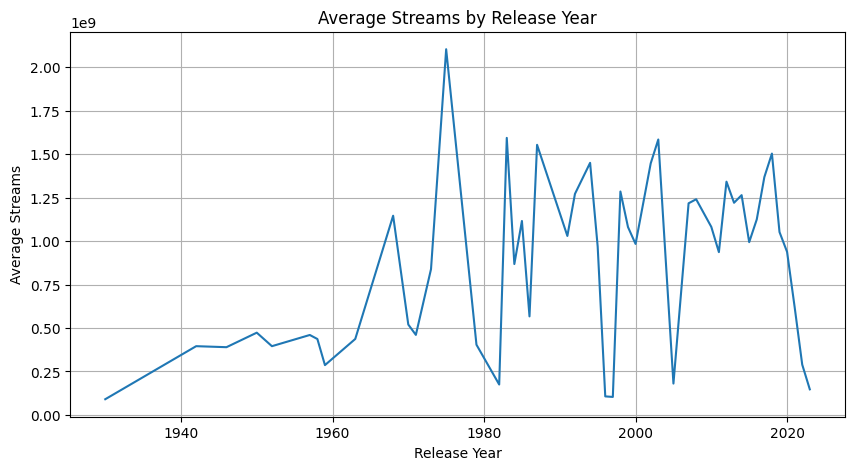

In [7]:
# Single line chart

avg_streams = df.groupby("released_year")["streams"].mean()

plt.figure(figsize=(10,5))
plt.plot(avg_streams.index, avg_streams.values)
plt.title("Average Streams by Release Year")
plt.xlabel("Release Year")
plt.ylabel("Average Streams")
plt.grid(True)
plt.show()



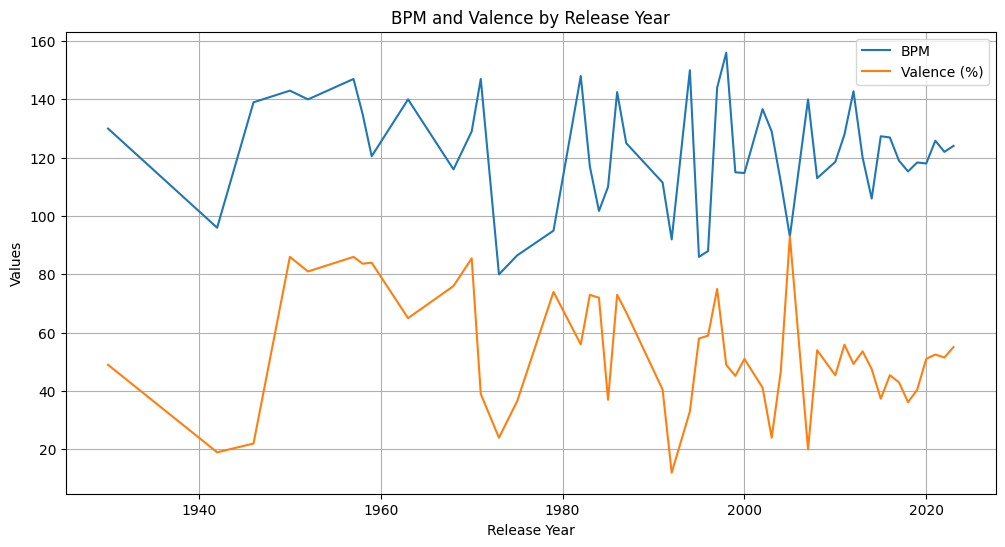

In [17]:
# Multiple Line chart 

yearly = df.groupby("released_year")[["bpm", "valence_%"]].mean()

plt.figure(figsize=(12,6))
plt.plot(yearly.index, yearly["bpm"], label="BPM")
plt.plot(yearly.index, yearly["valence_%"], label="Valence (%)")

plt.title("BPM and Valence by Release Year")
plt.xlabel("Release Year")
plt.ylabel("Values")
plt.legend()
plt.grid(True)
plt.show()

#### Bar Chart

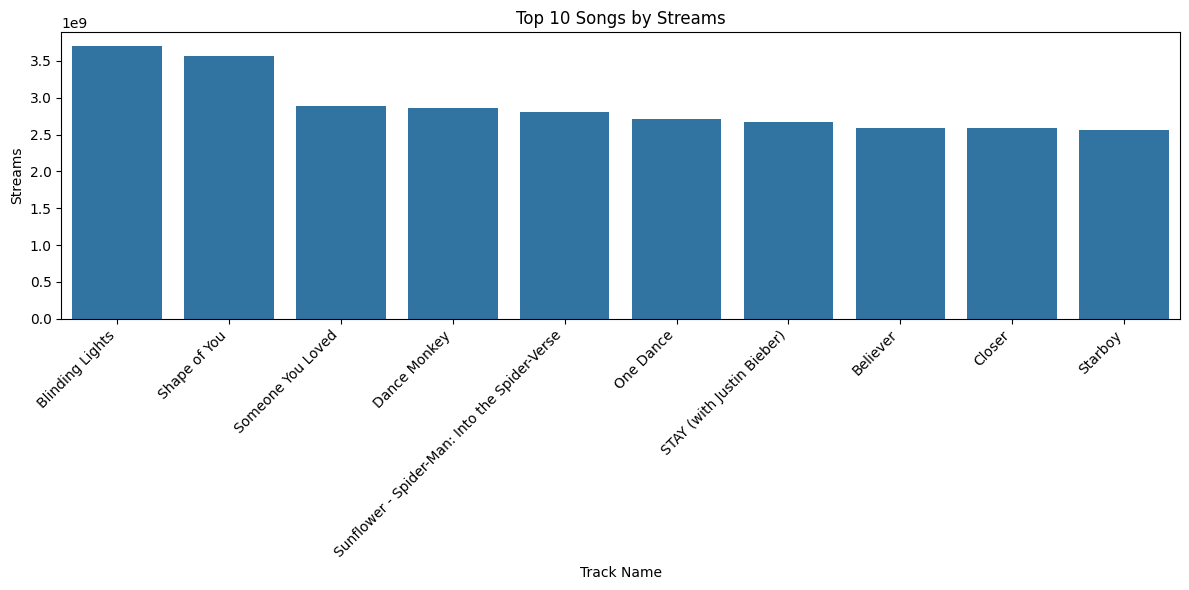

In [14]:
# Vertical bar chart

top_songs = (
    df.sort_values("streams", ascending=False)
      .head(10)[["track_name", "streams"]]
)

plt.figure(figsize=(12, 6))
sb.barplot(x="track_name", y="streams", data=top_songs)
plt.title("Top 10 Songs by Streams")
plt.xlabel("Track Name")
plt.ylabel("Streams")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

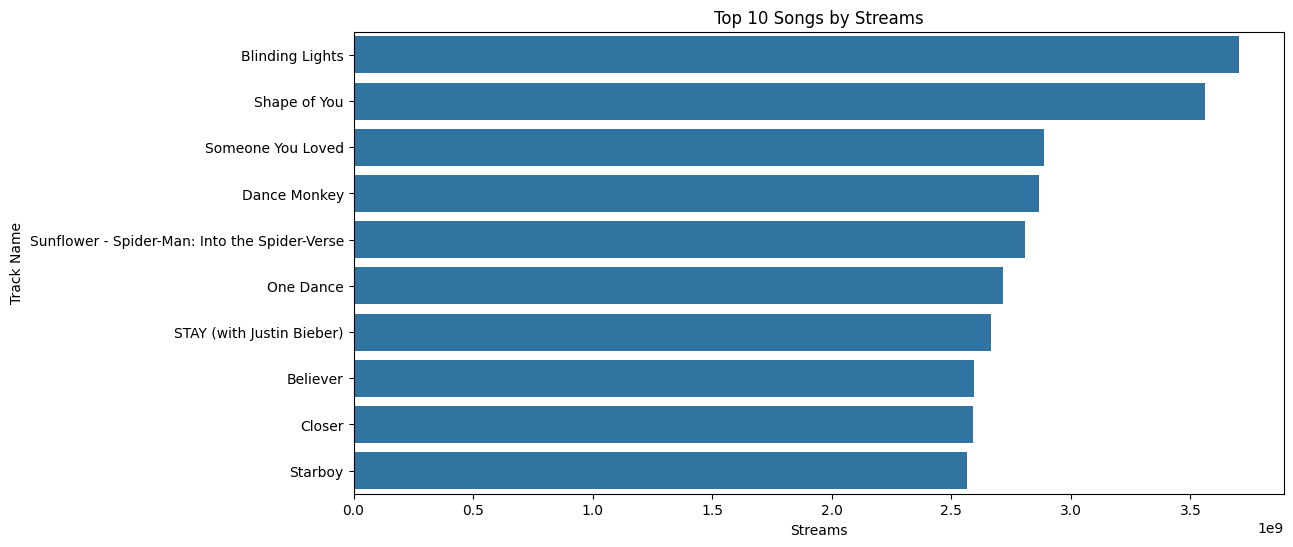

In [13]:
# Horizontal bar chart

top_songs = (
    df.sort_values("streams", ascending=False)
      .head(10)[["track_name", "streams"]]
)

plt.figure(figsize=(12,6))
sb.barplot(x="streams", y="track_name", data=top_songs)
plt.title("Top 10 Songs by Streams")
plt.xlabel("Streams")
plt.ylabel("Track Name")
plt.show()


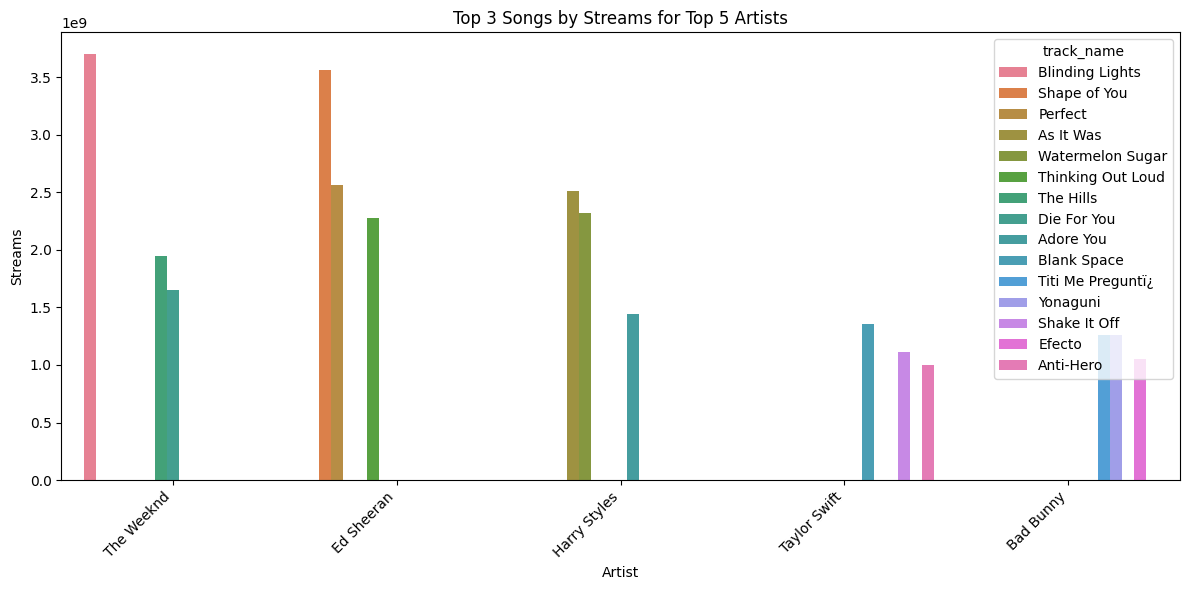

In [30]:
# Grouped bar chart
top_artists = (
    df.groupby("artist(s)_name")["streams"]
      .sum()
      .sort_values(ascending=False)
      .head(5)
      .index
)

grouped_df = (
    df[df["artist(s)_name"].isin(top_artists)]
      .sort_values("streams", ascending=False)
      .groupby("artist(s)_name")
      .head(3)
)

plt.figure(figsize=(12, 6))
sb.barplot(
    x="artist(s)_name",
    y="streams",
    hue="track_name",
    data=grouped_df
)

plt.title("Top 3 Songs by Streams for Top 5 Artists")
plt.xlabel("Artist")
plt.ylabel("Streams")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

#### Scatter Plot

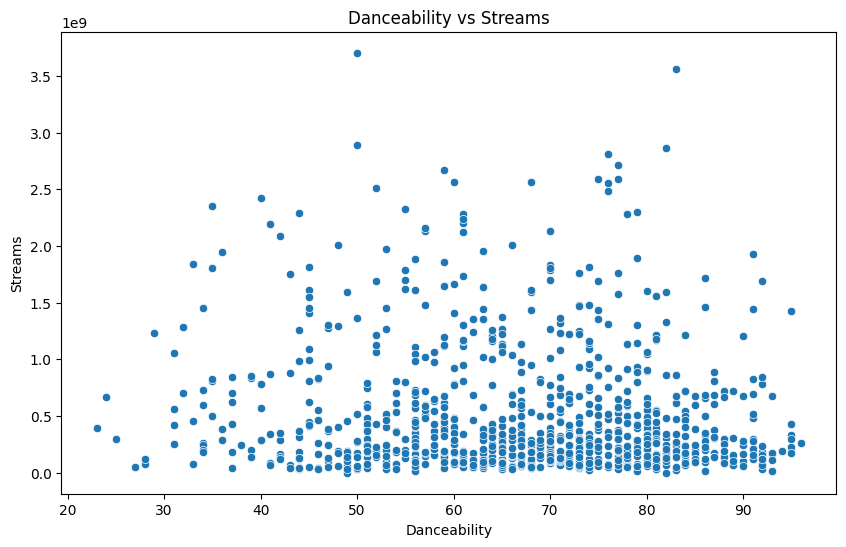

In [29]:
# scatter plot
plt.figure(figsize=(10,6))

sb.scatterplot(x="danceability_%", 
               y="streams", 
               data=df)

plt.title("Danceability vs Streams")
plt.xlabel("Danceability")
plt.ylabel("Streams")
plt.show()

#### Histogram

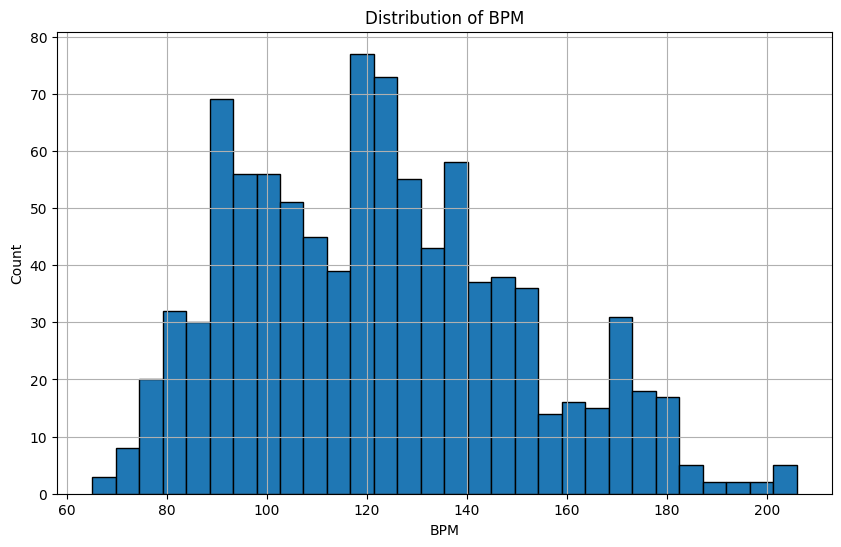

In [22]:
# histogram
plt.figure(figsize=(10,6))
plt.hist(df["bpm"], bins=30, edgecolor="black")
plt.title("Distribution of BPM")
plt.xlabel("BPM")
plt.ylabel("Count")
plt.grid(True)
plt.show()

#### Pie Chart

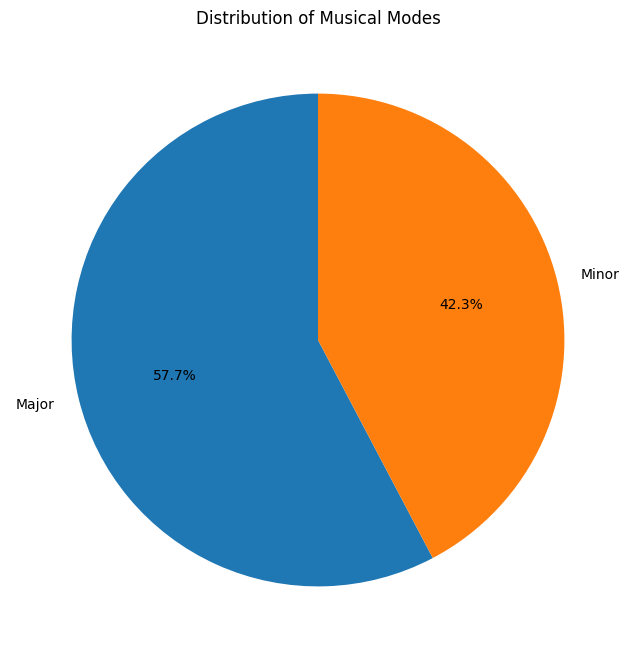

In [20]:
# pie chart

mode_counts = df["mode"].value_counts()

plt.figure(figsize=(8,8))
plt.pie(mode_counts, labels=mode_counts.index, autopct="%1.1f%%", startangle=90)
plt.title("Distribution of Musical Modes")
plt.show()